In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.axis import Axis
import matplotlib.ticker as ticker

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from scipy.special import softmax

plt.rcParams['figure.figsize'] = [32, 18]
sns.set_style('darkgrid')

tick_freq = 20
fontsize = 22

In [2]:
# BITCOIN

coin = 'bitcoin'
df = pd.read_csv(f'{coin}_dataset.csv')
display(df)

pos_neg_sentiments = np.vstack([df['positive'].values, df['negative'].values]).T
pos_neg_sentiments = softmax(pos_neg_sentiments, axis=1)

sentiments = pd.DataFrame({'positive': pos_neg_sentiments[:, 0], 'negative': pos_neg_sentiments[:, 1], 'date': df['date']})

,date,positive,negative,neutral,sentiment,price
0,2020-01-01,0.327065,0.117174,0.555761,0.377665,7199.8
1,2020-01-02,0.269417,0.132255,0.598327,0.229243,6967.0
2,2020-01-03,0.273025,0.142803,0.584172,0.222916,7343.1
3,2020-01-04,0.265981,0.127819,0.606200,0.227916,7376.8
4,2020-01-05,0.244098,0.130293,0.625609,0.181911,7372.5
...,...,...,...,...,...,...
541,2021-06-25,0.295894,0.165149,0.538958,0.242589,31594.0
542,2021-06-26,0.266205,0.161698,0.572097,0.182672,32243.4
543,2021-06-27,0.278143,0.174295,0.547562,0.189655,34678.5
544,2021-06-28,0.290887,0.159613,0.549500,0.238898,34475.9


########################### bitcoin positive sentiments ###########################
0.5342279340275189 0.013933773014100901


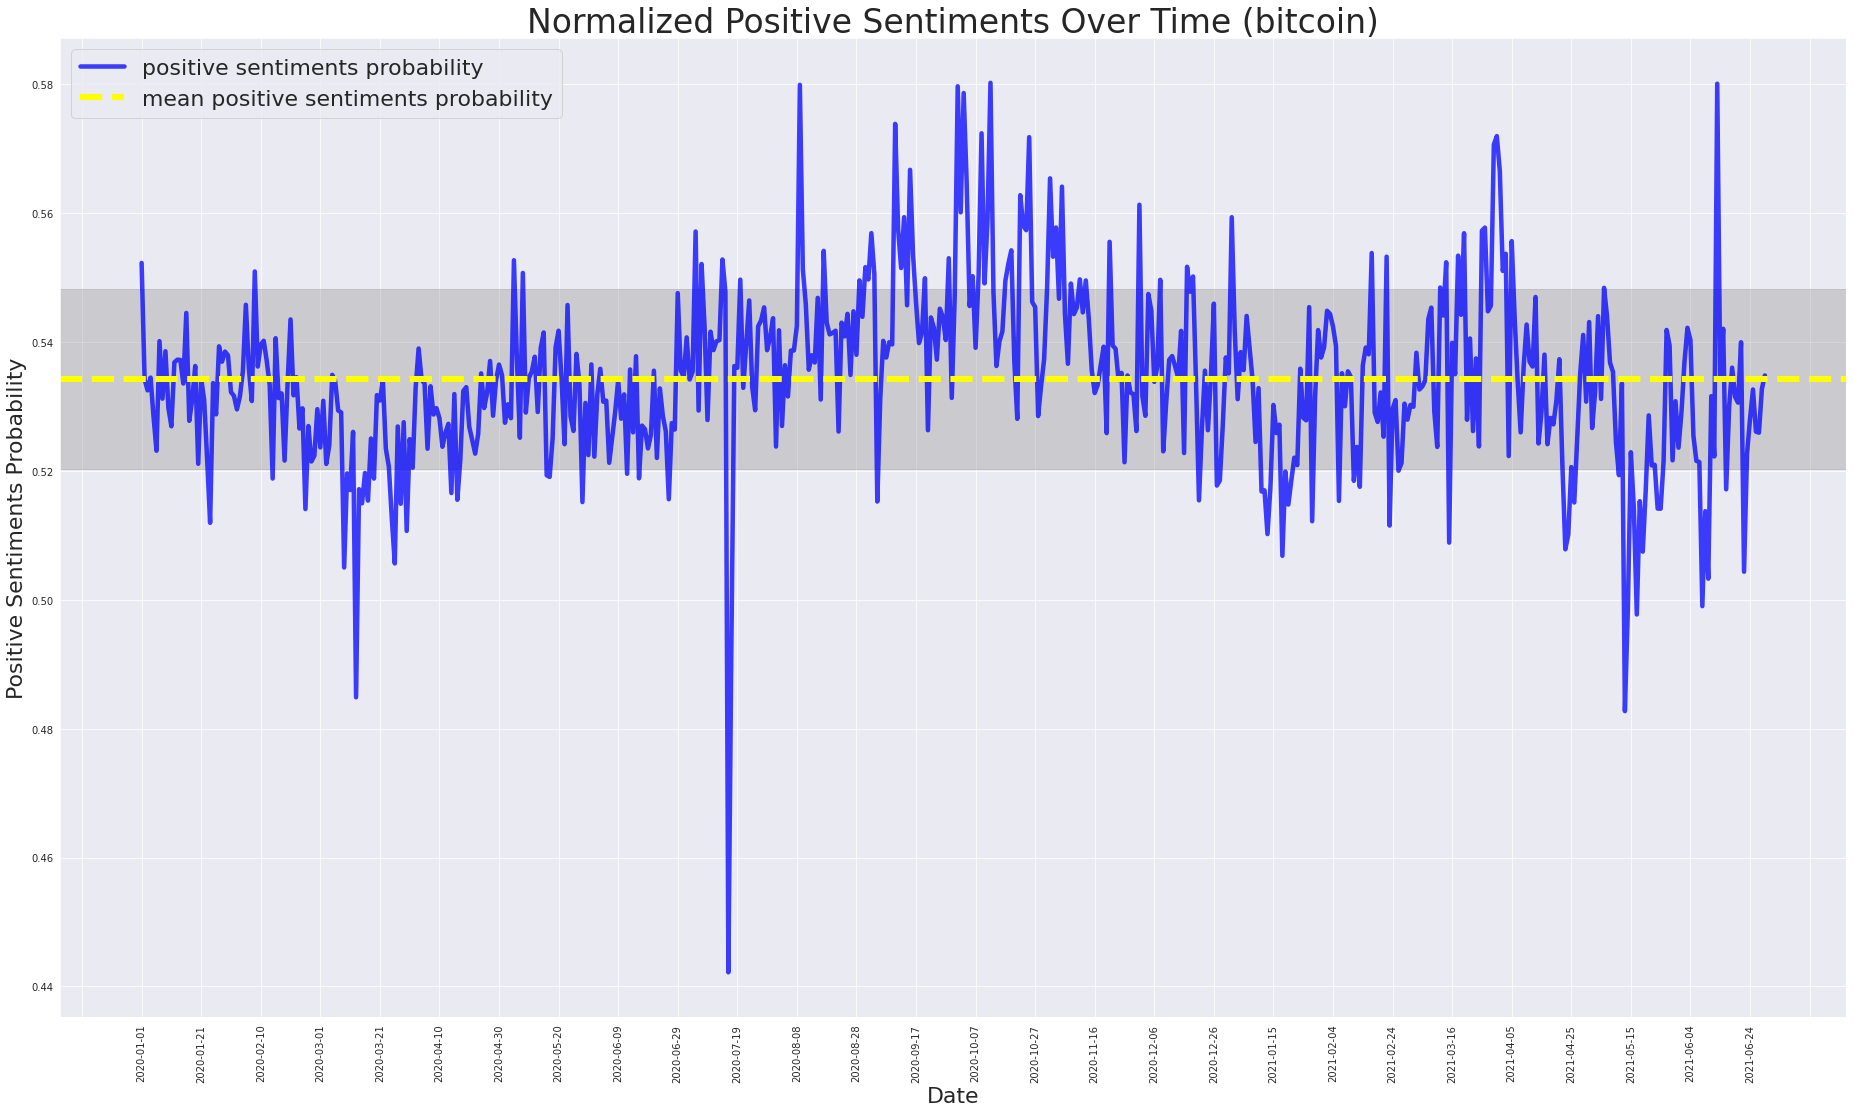

In [3]:
print('########################### {} positive sentiments ###########################'.format(coin))

fig, ax = plt.subplots() 
mean = sentiments['positive'].mean()
std  = sentiments['positive'].std()
print(mean, std)
ax.axhspan(mean-std, mean+std, color='grey', alpha=0.3)
sns.set_style('darkgrid')
ax.set_title('Normalized Positive Sentiments Over Time ({})'.format(coin), fontsize=1.5*fontsize)
ax.set_ylabel('Positive Sentiments Probability', fontsize=fontsize)
ax.set_xlabel('Date', fontsize=fontsize)
ax = sns.lineplot(x='date', y='positive', data = sentiments, linewidth=4.5, color='blue', alpha=0.75, label='positive sentiments probability')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_freq))
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation = 90)
ax.axhline(mean, ls='--', linewidth=6, color='yellow', label='mean positive sentiments probability')
ax.legend(fontsize=fontsize, loc='upper left')
plt.show()

########################### bitcoin negative sentiments ###########################
0.46577206597248105 0.013933773014100903


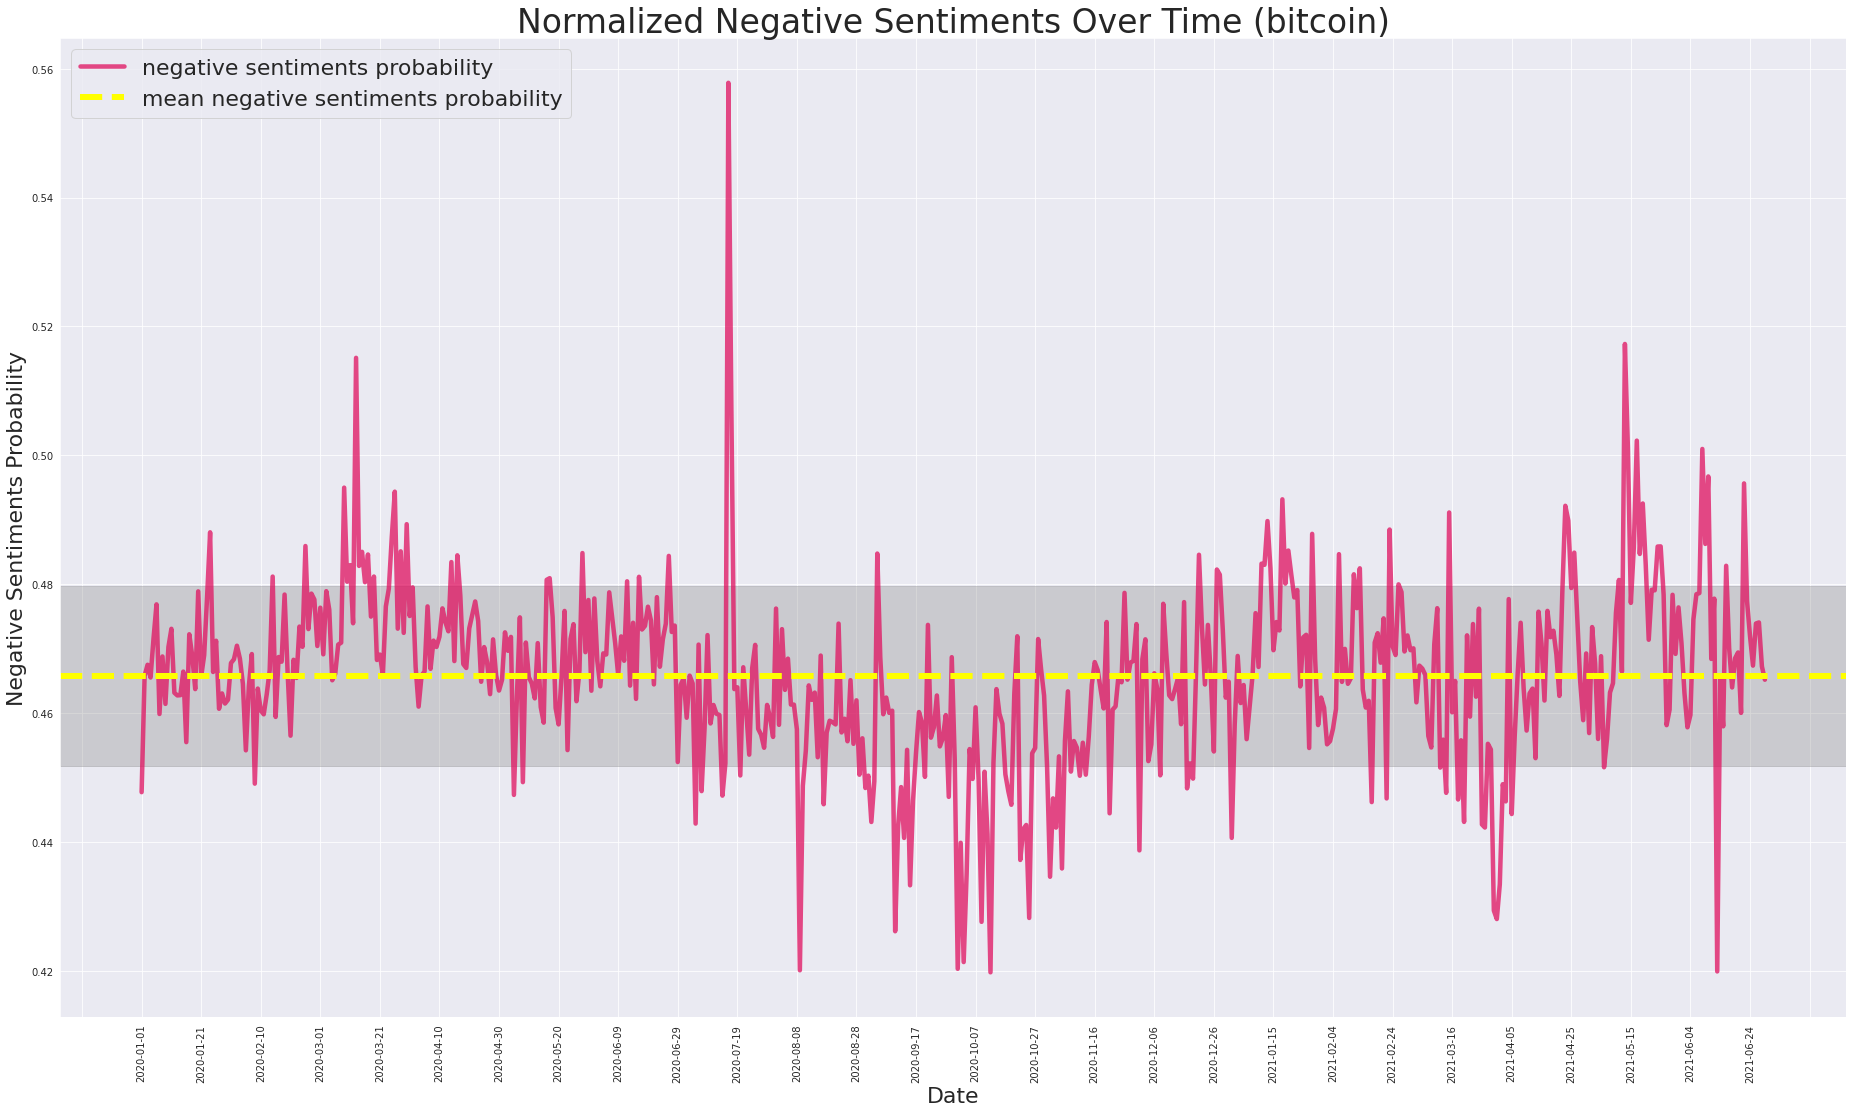

In [4]:
print('########################### {} negative sentiments ###########################'.format(coin))
fig, ax = plt.subplots() 
mean = sentiments['negative'].mean()
std  = sentiments['negative'].std()
print(mean, std)
ax.axhspan(mean-std, mean+std, color='grey', alpha=0.3)
sns.set_style('darkgrid')
ax.set_title('Normalized Negative Sentiments Over Time ({})'.format(coin), fontsize=1.5*fontsize)
ax.set_ylabel('Negative Sentiments Probability', fontsize=fontsize)
ax.set_xlabel('Date', fontsize=fontsize)
ax = sns.lineplot(x='date', y='negative', data = sentiments, linewidth=4.5, color='#E0115F', alpha=0.75, label='negative sentiments probability')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_freq))
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation = 90)
ax.axhline(mean, ls='--', linewidth=6, color='yellow', label='mean negative sentiments probability')
ax.legend(fontsize=fontsize, loc='upper left')
plt.show()

In [5]:
# DOGECOIN

coin = 'dogecoin'
df = pd.read_csv(f'{coin}_dataset.csv')
display(df)

pos_neg_sentiments = np.vstack([df['positive'].values, df['negative'].values]).T
pos_neg_sentiments = softmax(pos_neg_sentiments, axis=1)

sentiments = pd.DataFrame({'positive': pos_neg_sentiments[:, 0], 'negative': pos_neg_sentiments[:, 1], 'date': df['date']})

,date,positive,negative,neutral,sentiment,price
0,2020-01-01,0.312420,0.089892,0.597688,0.372314,0.002040
1,2020-01-02,0.261835,0.068683,0.669482,0.288510,0.001999
2,2020-01-03,0.304634,0.099289,0.596078,0.344494,0.002042
3,2020-01-04,0.294117,0.057551,0.648332,0.364885,0.002307
4,2020-01-05,0.265845,0.109450,0.624705,0.250351,0.002080
...,...,...,...,...,...,...
541,2021-06-25,0.447348,0.082556,0.470096,0.775997,0.237565
542,2021-06-26,0.405987,0.091461,0.502552,0.625858,0.244672
543,2021-06-27,0.390216,0.072784,0.537001,0.591120,0.263852
544,2021-06-28,0.413721,0.071630,0.514649,0.664707,0.255086


########################### dogecoin positive sentiments ###########################
0.5622354742873187 0.013006248216741149


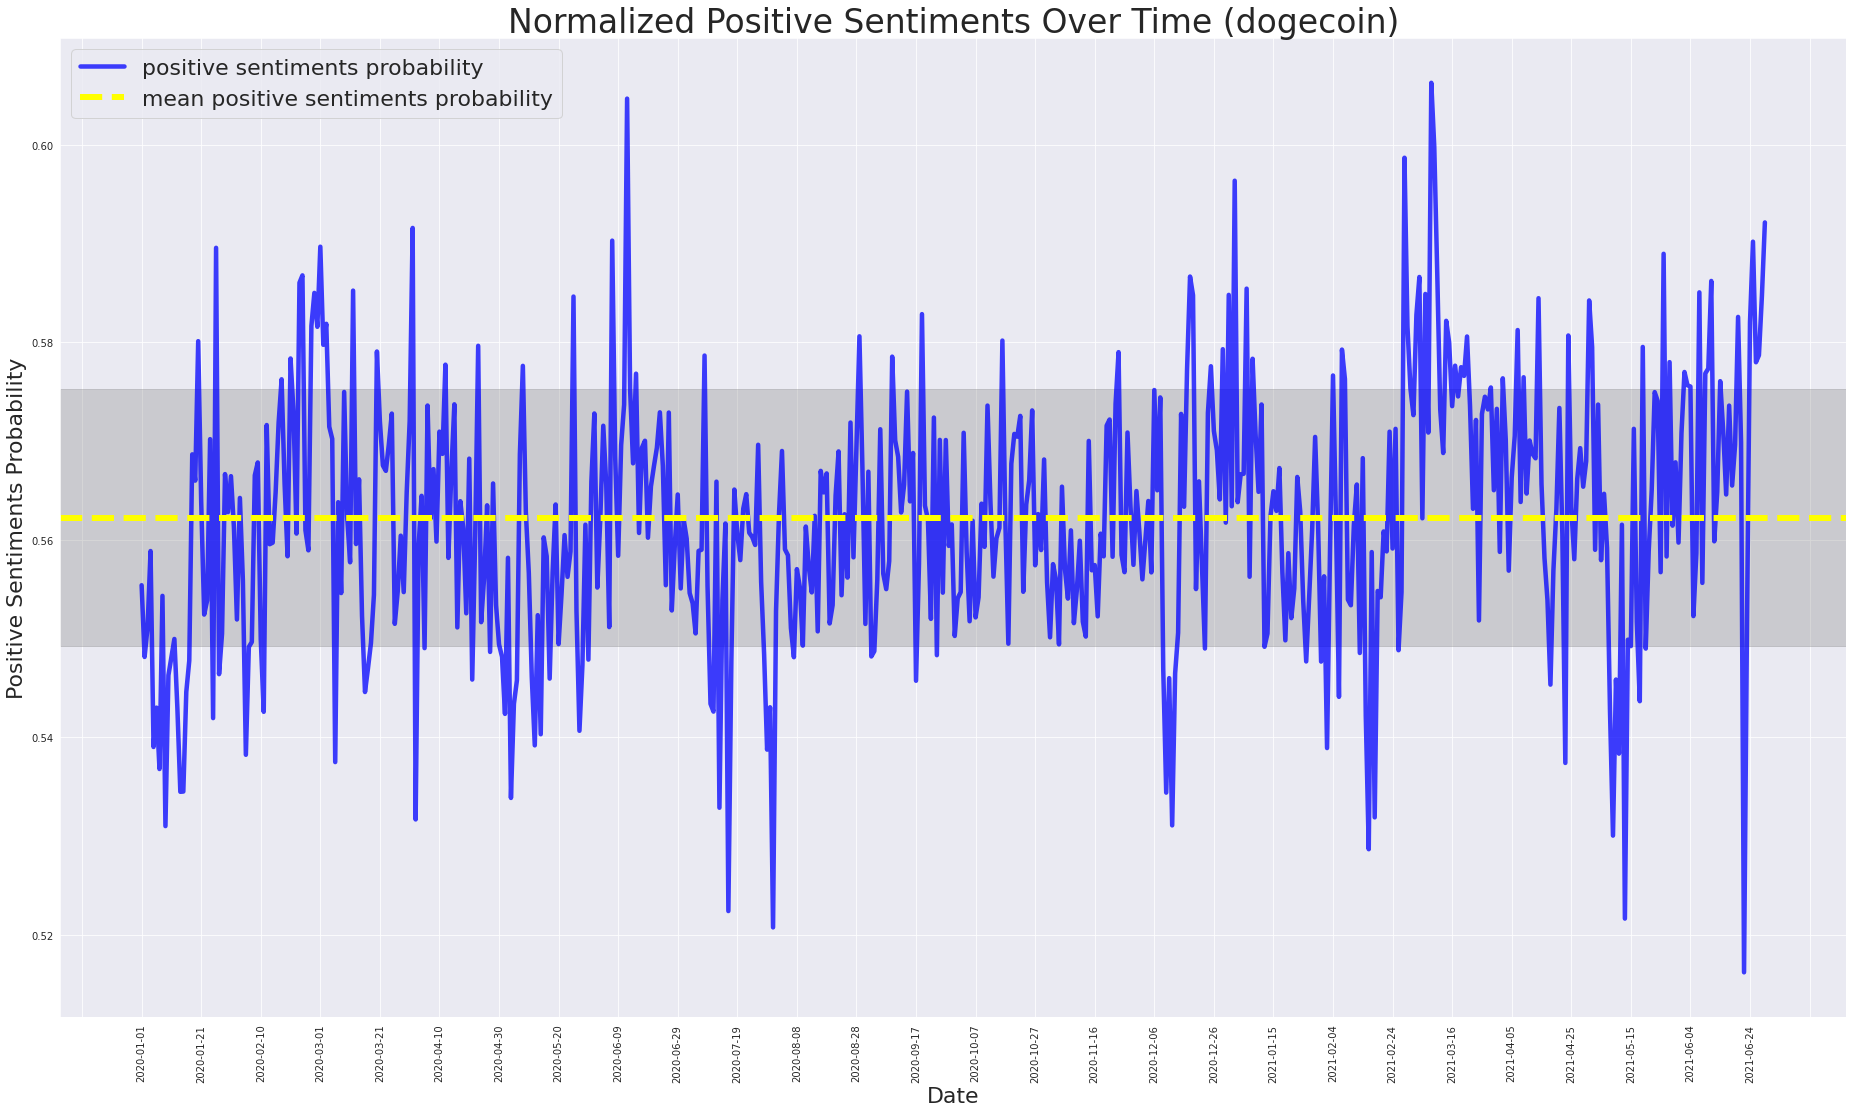

In [6]:
print('########################### {} positive sentiments ###########################'.format(coin))
fig, ax = plt.subplots() 
mean = sentiments['positive'].mean()
std  = sentiments['positive'].std()
print(mean, std)
ax.axhspan(mean-std, mean+std, color='grey', alpha=0.3)
sns.set_style('darkgrid')
ax.set_title('Normalized Positive Sentiments Over Time ({})'.format(coin), fontsize=1.5*fontsize)
ax.set_ylabel('Positive Sentiments Probability', fontsize=fontsize)
ax.set_xlabel('Date', fontsize=fontsize)
ax = sns.lineplot(x='date', y='positive', data = sentiments, linewidth=4.5, color='blue', alpha=0.75, label='positive sentiments probability')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_freq))
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation = 90)
ax.axhline(mean, ls='--', linewidth=6, color='yellow', label='mean positive sentiments probability')
ax.legend(fontsize=fontsize, loc='upper left')
plt.show()

########################### dogecoin negative sentiments ###########################
0.43776452571268143 0.013006248216741156


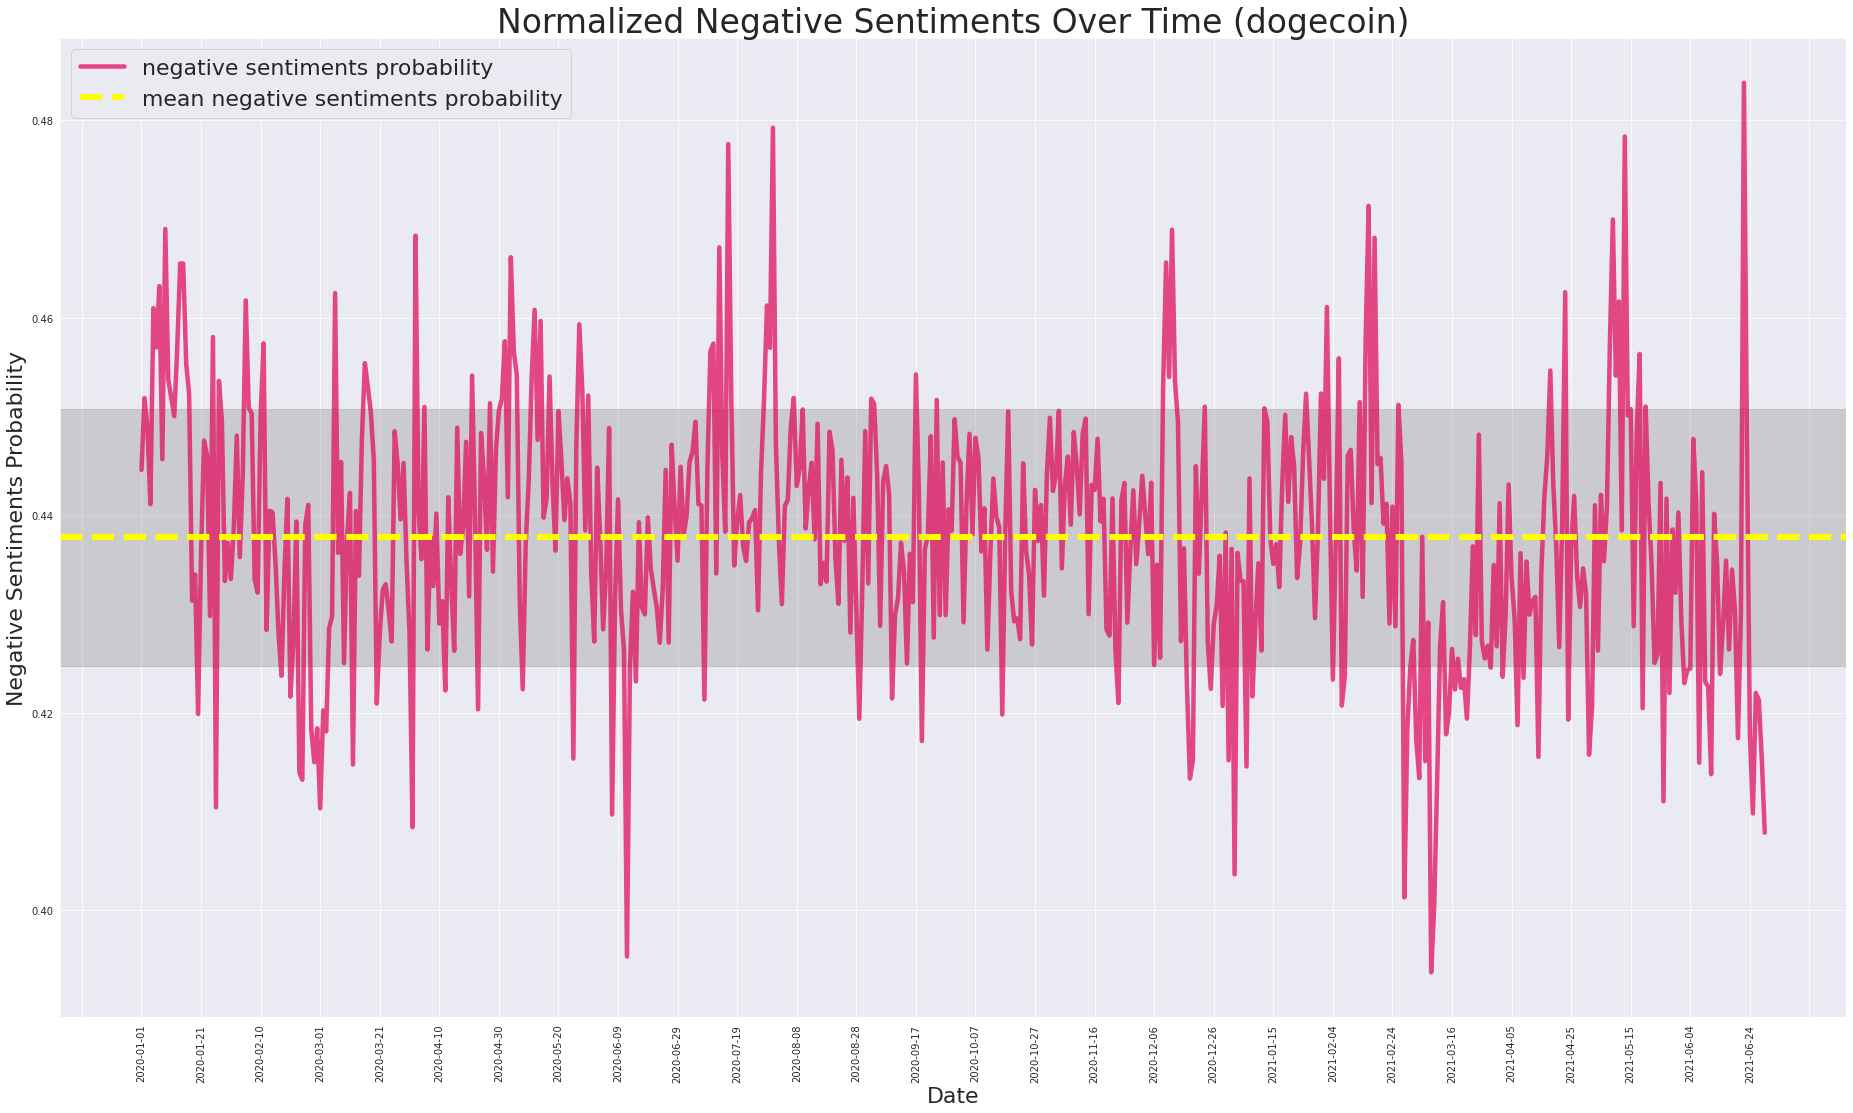

In [7]:
print('########################### {} negative sentiments ###########################'.format(coin))
fig, ax = plt.subplots() 
mean = sentiments['negative'].mean()
std  = sentiments['negative'].std()
print(mean, std)
ax.axhspan(mean-std, mean+std, color='grey', alpha=0.3)
sns.set_style('darkgrid')
ax.set_title('Normalized Negative Sentiments Over Time ({})'.format(coin), fontsize=1.5*fontsize)
ax.set_ylabel('Negative Sentiments Probability', fontsize=fontsize)
ax.set_xlabel('Date', fontsize=fontsize)
ax = sns.lineplot(x='date', y='negative', data = sentiments, linewidth=4.5, color='#E0115F', alpha=0.75, label='negative sentiments probability')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_freq))
ax.tick_params(axis='y')
ax.tick_params(axis='x', rotation = 90)
ax.axhline(mean, ls='--', linewidth=6, color='yellow', label='mean negative sentiments probability')
ax.legend(fontsize=fontsize, loc='upper left')
plt.show()